In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
hr_data = pd.read_csv('hr_data.csv')

In [3]:
hr_data.head()

,employee_id,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,1003,2,157,3,0,1,0,sales,low
1,1005,5,262,6,0,1,0,sales,medium
2,1486,7,272,4,0,1,0,sales,medium
3,1038,5,223,5,0,1,0,sales,low
4,1057,2,159,3,0,1,0,sales,low


In [4]:
hr_data.drop_duplicates(keep=False, inplace=True)
hr_data.shape

(14999, 9)

In [5]:
hr_data.columns

Index(['employee_id', 'number_project', 'average_montly_hours',
       'time_spend_company', 'Work_accident', 'left', 'promotion_last_5years',
       'department', 'salary'],
      dtype='object')

In [6]:
# rename the columns to amend the typos
hr_data.rename(columns={'average_montly_hours':'average_monthly_hours', 'Work_accident':'work_accident'}, inplace=True)

In [7]:
hr_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14999 entries, 0 to 14998
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   employee_id            14999 non-null  int64 
 1   number_project         14999 non-null  int64 
 2   average_monthly_hours  14999 non-null  int64 
 3   time_spend_company     14999 non-null  int64 
 4   work_accident          14999 non-null  int64 
 5   left                   14999 non-null  int64 
 6   promotion_last_5years  14999 non-null  int64 
 7   department             14999 non-null  object
 8   salary                 14999 non-null  object
dtypes: int64(7), object(2)
memory usage: 1.1+ MB


In [8]:
hr_data['department'].value_counts()

sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: department, dtype: int64

In [9]:
hr_data['salary'].value_counts()

low       7316
medium    6446
high      1237
Name: salary, dtype: int64

In [10]:
emp_sat_eval_data = pd.read_excel('employee_satisfaction_evaluation.xlsx')

In [11]:
emp_sat_eval_data.head()

,EMPLOYEE #,satisfaction_level,last_evaluation
0,1003,0.38,0.53
1,1005,0.80,0.86
2,1486,0.11,0.88
3,1038,0.72,0.87
4,1057,0.37,0.52


In [12]:
emp_sat_eval_data.drop_duplicates(keep=False, inplace=True)
emp_sat_eval_data.shape

(14999, 3)

In [13]:
# rename column for merging
emp_sat_eval_data.rename(columns={'EMPLOYEE #':'employee_id'}, inplace=True)

In [14]:
emp_sat_eval_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14999 entries, 0 to 14998
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   employee_id         14999 non-null  int64  
 1   satisfaction_level  14972 non-null  float64
 2   last_evaluation     14972 non-null  float64
dtypes: float64(2), int64(1)
memory usage: 468.7 KB


In [15]:
# merge the dataframes
df = pd.merge(hr_data, emp_sat_eval_data)

In [16]:
df.head(10)

,employee_id,number_project,average_monthly_hours,time_spend_company,work_accident,left,promotion_last_5years,department,salary,satisfaction_level,last_evaluation
0,1003,2,157,3,0,1,0,sales,low,0.38,0.53
1,1005,5,262,6,0,1,0,sales,medium,0.80,0.86
2,1486,7,272,4,0,1,0,sales,medium,0.11,0.88
3,1038,5,223,5,0,1,0,sales,low,0.72,0.87
4,1057,2,159,3,0,1,0,sales,low,0.37,0.52
5,1060,2,153,3,0,1,0,sales,low,0.41,0.50
6,1061,6,247,4,0,1,0,sales,low,0.10,0.77
7,1576,5,259,5,0,1,0,sales,low,0.92,0.85
8,1752,5,224,5,0,1,0,sales,low,0.89,1.00
9,1988,2,142,3,0,1,0,sales,low,0.42,0.53


In [17]:
# show which columns have missing data
df.isnull().sum()
#df[df.isnull().any(axis=1)]

employee_id               0
number_project            0
average_monthly_hours     0
time_spend_company        0
work_accident             0
left                      0
promotion_last_5years     0
department                0
salary                    0
satisfaction_level       27
last_evaluation          27
dtype: int64

In [18]:
df.describe()

,employee_id,number_project,average_monthly_hours,time_spend_company,work_accident,left,promotion_last_5years,satisfaction_level,last_evaluation
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14972.000000,14972.000000
mean,45424.627575,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268,0.612830,0.716125
std,25915.900127,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281,0.248714,0.171138
min,1003.000000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000,0.090000,0.360000
25%,22872.500000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000,0.440000,0.560000
50%,45448.000000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000,0.640000,0.720000
75%,67480.500000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000,0.820000,0.870000
max,99815.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [19]:
# fill the NaN values with the mean
df.fillna(df.mean(), inplace=True)

In [20]:
df.head(20)

,employee_id,number_project,average_monthly_hours,time_spend_company,work_accident,left,promotion_last_5years,department,salary,satisfaction_level,last_evaluation
0,1003,2,157,3,0,1,0,sales,low,0.38000,0.530000
1,1005,5,262,6,0,1,0,sales,medium,0.80000,0.860000
2,1486,7,272,4,0,1,0,sales,medium,0.11000,0.880000
3,1038,5,223,5,0,1,0,sales,low,0.72000,0.870000
4,1057,2,159,3,0,1,0,sales,low,0.37000,0.520000
5,1060,2,153,3,0,1,0,sales,low,0.41000,0.500000
6,1061,6,247,4,0,1,0,sales,low,0.10000,0.770000
7,1576,5,259,5,0,1,0,sales,low,0.92000,0.850000
8,1752,5,224,5,0,1,0,sales,low,0.89000,1.000000
9,1988,2,142,3,0,1,0,sales,low,0.42000,0.530000


In [21]:
# drop employee_id
df.drop(columns='employee_id', inplace = True)

In [22]:
df.columns

Index(['number_project', 'average_monthly_hours', 'time_spend_company',
       'work_accident', 'left', 'promotion_last_5years', 'department',
       'salary', 'satisfaction_level', 'last_evaluation'],
      dtype='object')

In [23]:
df.groupby(['department']).sum()

,number_project,average_monthly_hours,time_spend_company,work_accident,left,promotion_last_5years,satisfaction_level,last_evaluation
department,,,,,,,,
IT,4683,248119,4256,164,273,3,758.17283,879.452250
RandD,3033,158030,2650,134,121,27,487.80000,560.446125
accounting,2934,154292,2702,96,204,14,446.68283,550.706125
hr,2701,146828,2480,89,215,15,442.53566,524.006125
management,2432,126787,2711,103,91,69,391.76566,456.234499
marketing,3164,171073,3063,138,203,43,530.62283,613.946125
product_mng,3434,180369,3135,132,198,0,559.19566,644.662250
sales,15634,831773,14631,587,1014,100,2543.77981,2938.236749
support,8479,447490,7563,345,555,20,1377.90849,1611.534499


In [24]:
df.groupby(['department']).mean()

,number_project,average_monthly_hours,time_spend_company,work_accident,left,promotion_last_5years,satisfaction_level,last_evaluation
department,,,,,,,,
IT,3.816626,202.215974,3.468623,0.133659,0.222494,0.002445,0.617908,0.716750
RandD,3.853875,200.800508,3.367217,0.170267,0.153748,0.034307,0.619822,0.712130
accounting,3.825293,201.162973,3.522816,0.125163,0.265971,0.018253,0.582377,0.718000
hr,3.654939,198.684709,3.355886,0.120433,0.290934,0.020298,0.598830,0.709075
management,3.860317,201.249206,4.303175,0.163492,0.144444,0.109524,0.621850,0.724182
marketing,3.687646,199.385781,3.569930,0.160839,0.236597,0.050117,0.618442,0.715555
product_mng,3.807095,199.965632,3.475610,0.146341,0.219512,0.000000,0.619951,0.714703
sales,3.776329,200.911353,3.534058,0.141787,0.244928,0.024155,0.614440,0.709719
support,3.803948,200.758188,3.393001,0.154778,0.248991,0.008973,0.618173,0.722985


In [25]:
# print how many employees left
df['left'].value_counts()

0    11428
1     3571
Name: left, dtype: int64

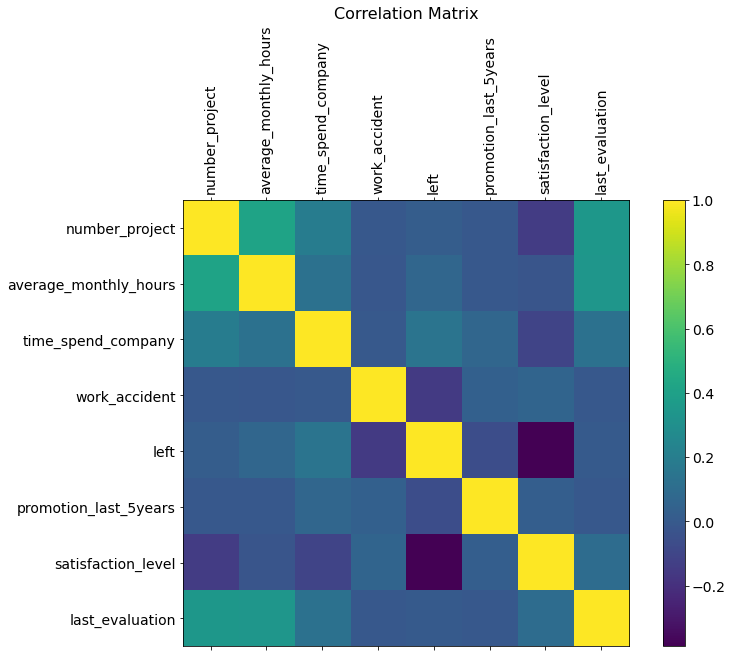

In [26]:
# correlation matrix
f = plt.figure(figsize=(12, 8))
plt.matshow(df.corr(), fignum=f.number)
plt.xticks(range(df.select_dtypes(['number']).shape[1]), df.select_dtypes(['number']).columns, fontsize=14, rotation=90)
plt.yticks(range(df.select_dtypes(['number']).shape[1]), df.select_dtypes(['number']).columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16);

In [27]:
# one hot encoding for categorical data
categorical_columns = ['department', 'salary']
df = pd.get_dummies(df, columns=categorical_columns, drop_first=True)
df.head()

,number_project,average_monthly_hours,time_spend_company,work_accident,left,promotion_last_5years,satisfaction_level,last_evaluation,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical,salary_low,salary_medium
0,2,157,3,0,1,0,0.38,0.53,0,0,0,0,0,0,1,0,0,1,0
1,5,262,6,0,1,0,0.80,0.86,0,0,0,0,0,0,1,0,0,0,1
2,7,272,4,0,1,0,0.11,0.88,0,0,0,0,0,0,1,0,0,0,1
3,5,223,5,0,1,0,0.72,0.87,0,0,0,0,0,0,1,0,0,1,0
4,2,159,3,0,1,0,0.37,0.52,0,0,0,0,0,0,1,0,0,1,0


In [28]:
# print number of columns after one hot encoding
df.shape[1]

19

In [29]:
from sklearn.model_selection import train_test_split

In [30]:
# drop target column
X = df.drop(['left'], axis=1).values
# target column
y = df['left'].values 

In [31]:
# train:test = 0.7:0.3
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [32]:
# normalise the data
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [33]:
df_train = pd.DataFrame(X_train)
df_train.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,-0.652685,-1.152776,4.460232,2.432352,-0.14999,0.029833,0.084342,-0.232629,-0.230804,-0.224087,-0.212105,-0.244231,-0.255632,-0.617614,2.404641,-0.476241,-0.972101,-0.866098
1,0.974030,0.937493,1.025787,-0.411125,-0.14999,1.077462,0.958484,-0.232629,-0.230804,-0.224087,-0.212105,-0.244231,-0.255632,-0.617614,-0.415862,2.099778,-0.972101,1.154604
2,0.160673,0.897295,1.025787,-0.411125,-0.14999,1.198342,1.191589,-0.232629,-0.230804,-0.224087,-0.212105,-0.244231,-0.255632,1.619134,-0.415862,-0.476241,1.028700,-0.866098
3,-1.466042,-1.072381,-0.347992,-0.411125,-0.14999,-0.977503,-1.314286,-0.232629,-0.230804,-0.224087,-0.212105,-0.244231,-0.255632,1.619134,-0.415862,-0.476241,1.028700,-0.866098
4,1.787388,1.962528,0.338898,-0.411125,-0.14999,-2.065425,1.075036,-0.232629,-0.230804,-0.224087,-0.212105,4.094485,-0.255632,-0.617614,-0.415862,-0.476241,1.028700,-0.866098


In [34]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

In [35]:
# Logistic Regression Model
from sklearn.linear_model import LogisticRegression

lgr_model = LogisticRegression()
lgr_model.fit(X_train, y_train)

print('\033[1m',"Logistic Regression Model", '\033[0m')
y_pred = lgr_model.predict(X_test)
print(f"Accuracy: {(100*accuracy_score(y_pred, y_test)).round(2)}%")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

 Logistic Regression Model 
Accuracy: 79.91%
[[3214  236]
 [ 668  382]]
              precision    recall  f1-score   support

           0       0.83      0.93      0.88      3450
           1       0.62      0.36      0.46      1050

    accuracy                           0.80      4500
   macro avg       0.72      0.65      0.67      4500
weighted avg       0.78      0.80      0.78      4500



In [36]:
# Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

rfc_model = RandomForestClassifier()
rfc_model.fit(X_train, y_train)


y_pred = rfc_model.predict(X_test)
score = rfc_model.score(X_test, y_test)

print('\033[1m',"Random Forest Classifier", '\033[0m')
print(f"Accuracy: {(100*accuracy_score(y_pred, y_test)).round(2)}%")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

 Random Forest Classifier 
Accuracy: 99.13%
[[3444    6]
 [  33 1017]]
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      3450
           1       0.99      0.97      0.98      1050

    accuracy                           0.99      4500
   macro avg       0.99      0.98      0.99      4500
weighted avg       0.99      0.99      0.99      4500



In [37]:
# Deep Learning
import tensorflow as tf
tf.version.VERSION

'2.5.0'

In [38]:
import tensorflow.keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()
# input dimension = number of features
model.add(Dense(9, kernel_initializer='uniform', activation='relu', input_dim=18))
model.add(Dense(1, kernel_initializer='uniform', activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=["accuracy"])

In [39]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 9)                 171       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 10        
Total params: 181
Trainable params: 181
Non-trainable params: 0
_________________________________________________________________


In [40]:
batch_size = 10
epochs = 25

history = model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(X_test, y_test))

score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss: ', score[0])
print('Test accuracy: ', score[1])

Epoch 1/25
1050/1050 [==============================] - 2s 2ms/step - loss: 0.4287 - accuracy: 0.7910 - val_loss: 0.3176 - val_accuracy: 0.8360
Epoch 2/25
1050/1050 [==============================] - 1s 1ms/step - loss: 0.2919 - accuracy: 0.8352 - val_loss: 0.2572 - val_accuracy: 0.8998
Epoch 3/25
1050/1050 [==============================] - 1s 1ms/step - loss: 0.2475 - accuracy: 0.9172 - val_loss: 0.2286 - val_accuracy: 0.9429
Epoch 4/25
1050/1050 [==============================] - 1s 1ms/step - loss: 0.2226 - accuracy: 0.9417 - val_loss: 0.2085 - val_accuracy: 0.9473
Epoch 5/25
1050/1050 [==============================] - 2s 2ms/step - loss: 0.2057 - accuracy: 0.9470 - val_loss: 0.1964 - val_accuracy: 0.9518
Epoch 6/25
1050/1050 [==============================] - 1s 1ms/step - loss: 0.1939 - accuracy: 0.9501 - val_loss: 0.1864 - val_accuracy: 0.9544
Epoch 7/25
1050/1050 [==============================] - 1s 1ms/step - loss: 0.1855 - accuracy: 0.9524 - val_loss: 0.1795 - val_accuracy:

In [41]:
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5)

print('\033[1m',"Deep Learning", '\033[0m')
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

 Deep Learning 
[[3348  102]
 [  93  957]]
              precision    recall  f1-score   support

           0       0.97      0.97      0.97      3450
           1       0.90      0.91      0.91      1050

    accuracy                           0.96      4500
   macro avg       0.94      0.94      0.94      4500
weighted avg       0.96      0.96      0.96      4500



In [42]:
# a deeper model

from tensorflow.keras.regularizers import l2
from tensorflow.keras.layers import Dropout

model2 = Sequential()

# Hidden Layer 1
model2.add(Dense(270, activation='relu', input_dim=18, kernel_regularizer=l2(0.01)))
model2.add(Dropout(0.3, noise_shape=None, seed=None))

# Hidden Layer 1
model2.add(Dense(180, activation='relu', input_dim=18, kernel_regularizer=l2(0.01)))
model2.add(Dropout(0.3, noise_shape=None, seed=None))

# Hidden Layer 2
model2.add(Dense(90, activation = 'relu', kernel_regularizer=l2(0.01)))
model.add(Dropout(0.3, noise_shape=None, seed=None))

model2.add(Dense(1, activation='sigmoid'))

model2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 270)               5130      
_________________________________________________________________
dropout (Dropout)            (None, 270)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 180)               48780     
_________________________________________________________________
dropout_1 (Dropout)          (None, 180)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 90)                16290     
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 91        
Total params: 70,291
Trainable params: 70,291
Non-trainable params: 0
__________________________________________________

In [43]:
model2.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [44]:
batch_size = 10
epochs = 25

history = model2.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(X_test, y_test))

score = model2.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Epoch 1/25
1050/1050 [==============================] - 4s 3ms/step - loss: 0.6475 - accuracy: 0.9056 - val_loss: 0.2965 - val_accuracy: 0.9469
Epoch 2/25
1050/1050 [==============================] - 3s 3ms/step - loss: 0.2816 - accuracy: 0.9365 - val_loss: 0.2699 - val_accuracy: 0.9353
Epoch 3/25
1050/1050 [==============================] - 3s 3ms/step - loss: 0.2618 - accuracy: 0.9419 - val_loss: 0.2470 - val_accuracy: 0.9522
Epoch 4/25
1050/1050 [==============================] - 3s 3ms/step - loss: 0.2586 - accuracy: 0.9421 - val_loss: 0.2352 - val_accuracy: 0.9478
Epoch 5/25
1050/1050 [==============================] - 3s 3ms/step - loss: 0.2526 - accuracy: 0.9419 - val_loss: 0.2293 - val_accuracy: 0.9524
Epoch 6/25
1050/1050 [==============================] - 3s 3ms/step - loss: 0.2474 - accuracy: 0.9435 - val_loss: 0.2232 - val_accuracy: 0.9580
Epoch 7/25
1050/1050 [==============================] - 4s 3ms/step - loss: 0.2458 - accuracy: 0.9449 - val_loss: 0.2190 - val_accuracy:

In [46]:
# since random forest was the best
df.drop(['left'],axis=1).columns

Index(['number_project', 'average_monthly_hours', 'time_spend_company',
       'work_accident', 'promotion_last_5years', 'satisfaction_level',
       'last_evaluation', 'department_RandD', 'department_accounting',
       'department_hr', 'department_management', 'department_marketing',
       'department_product_mng', 'department_sales', 'department_support',
       'department_technical', 'salary_low', 'salary_medium'],
      dtype='object')

In [47]:
feature_importances = pd.DataFrame(rfc_model.feature_importances_,
                                   index = pd.DataFrame(X_train).columns,
                                    columns=['importance']).sort_values('importance',ascending=False)

feature_importances

,importance
5,0.294146
0,0.184037
2,0.180404
1,0.165010
6,0.134996
3,0.008692
16,0.007142
17,0.003871
15,0.003665
13,0.003631


Satisfaction level (5th column) is the most important factor to determinie if an employee will leave or not. If an employee, who has a low satisfaction level, is an assest to the business, the employer can give him extra benefits, e.g. give him a raise, to ensure the employee is satisfied and, hence, does not leave. 